### 1. Import all required libraries

In [45]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Read the csv file 

In [46]:
df = pd.read_csv("amazon.csv")
df.head(2)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01


### 3. Check data type of each column
- a. Find what is the type of ‘date’ column is
- b. If it is of ‘object’ type, we need to convert the type into datetime
- c. For conversion you need to make changes again in read_csv method, put third parameter into it for parsing dates (you need to figure out by yourself regarding third parameter)
- d. Please check after making changes what is the data type of date column is (it should be datetime)

In [47]:
df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [48]:
df = pd.read_csv("amazon.csv", parse_dates=["date"])
df.head(2)

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01


In [49]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

### 4. Display top 5 rows of the dataset

In [50]:
df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


### 5. Check the last 5 rows.

In [51]:
df.tail()

,year,state,month,number,date
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01
6453,2016,Tocantins,Dezembro,119.0,2016-01-01


### 6. Find the shape of our dataset (number of rows and number of columns).
- a. Kindly print number of rows and columns separately

In [52]:
print("Rows: ",df.shape[0])
print("Columns: ",df.shape[1])

Rows:  6454
Columns:  5


### 7. Getting information about our dataset like total number rows, total number of columns, datatypes of each column and memory req

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6454 non-null   int64         
 1   state   6454 non-null   object        
 2   month   6454 non-null   object        
 3   number  6454 non-null   float64       
 4   date    6454 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 252.2+ KB


### 8. Check for duplicate data and drop them.
- a. You can use duplicated () method
- b. Please mention how many duplicate values are removed

In [54]:
print("Number of Duplicated Values:",df[df.duplicated()].shape[0])

Number of Duplicated Values: 32


In [55]:
print("Before remove dupliates df.shape: ",df.shape)
df = df.drop_duplicates()
print("After remove dupliates df.shape: ",df.shape)

Before remove dupliates df.shape:  (6454, 5)
After remove dupliates df.shape:  (6422, 5)


### 9. Check null values in the dataset.
- a. Please add a comment if you find any null value

In [56]:
df.isnull().sum() # No null value

year      0
state     0
month     0
number    0
date      0
dtype: int64

- No null value observed

### 10. Get overall statistics about the data frame.
- a. Here you will find that you are getting only numeric columns
- b. Kindly show categorical columns as well, if you find any warning then kindly add extra parameters in method.

In [57]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [58]:
df.describe(include="all")

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,20
top,NaN,Rio,Agosto,NaN,2015-01-01 00:00:00
freq,NaN,697,540,NaN,324
first,NaN,NaN,NaN,NaN,1998-01-01 00:00:00
last,NaN,NaN,NaN,NaN,2017-01-01 00:00:00
mean,2007.490969,NaN,NaN,108.815178,NaN
std,5.731806,NaN,NaN,191.142482,NaN
min,1998.000000,NaN,NaN,0.000000,NaN
25%,2003.000000,NaN,NaN,3.000000,NaN


In [59]:
df.describe(include="all",datetime_is_numeric=True)

,year,state,month,number,date
count,6422.000000,6422,6422,6422.000000,6422
unique,NaN,23,12,NaN,NaN
top,NaN,Rio,Agosto,NaN,NaN
freq,NaN,697,540,NaN,NaN
mean,2007.490969,NaN,NaN,108.815178,2007-06-29 10:46:40.622859008
min,1998.000000,NaN,NaN,0.000000,1998-01-01 00:00:00
25%,2003.000000,NaN,NaN,3.000000,2003-01-01 00:00:00
50%,2007.000000,NaN,NaN,24.497000,2007-01-01 00:00:00
75%,2012.000000,NaN,NaN,114.000000,2012-01-01 00:00:00
max,2017.000000,NaN,NaN,998.000000,2017-01-01 00:00:00


### 11. Rename month names to english.
- a. You will some columns in different language, you need to change them into english

In [60]:
df["month"].unique()

array(['Janeiro', 'Fevereiro', 'Mar�o', 'Abril', 'Maio', 'Junho', 'Julho',
       'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'],
      dtype=object)

In [61]:
replace_dic = {
    "Janeiro" : "January",
    "Fevereiro" : "February",
    "Mar�o" : "March",
    "Abril" : "April",
    "Maio" : "May",
    "Junho" : "June",
    "Julho" : "July",
    "Agosto" : "August",
    "Setembro" : "September",
    "Outubro" : "October",
    "Novembro" : "November",
    "Dezembro" : "December",
    
}

In [62]:
df["month"] = df["month"].replace(replace_dic)
df.head()

,year,state,month,number,date
0,1998,Acre,January,0.0,1998-01-01
1,1999,Acre,January,0.0,1999-01-01
2,2000,Acre,January,0.0,2000-01-01
3,2001,Acre,January,0.0,2001-01-01
4,2002,Acre,January,0.0,2002-01-01


### 12. Total number of fires registered

In [63]:
print("Total number of fires registered: ",int(df["number"].sum()))

Total number of fires registered:  698811


### 13. In which month was the maximum number of forest fires reported?
- a. You need to create proper stats and showing them with the help of bar plot
- b. Mention in your comment what did you observe

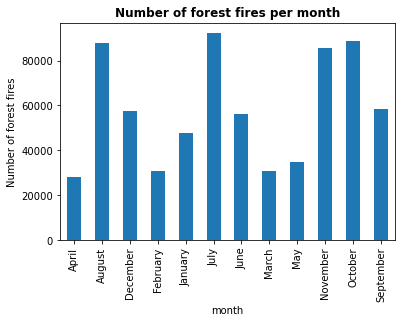

In [64]:
df.groupby("month")["number"].sum().plot(kind = "bar");
plt.ylabel("Number of forest fires")
plt.title("Number of forest fires per month", weight = "bold")
plt.show()

- Based on the observation of this graph, it can be deduced that **July** exhibits the greatest number of recorded forest fires, followed by **August** and **October**.

### 14. In which year was the maximum number of forest fires reported?

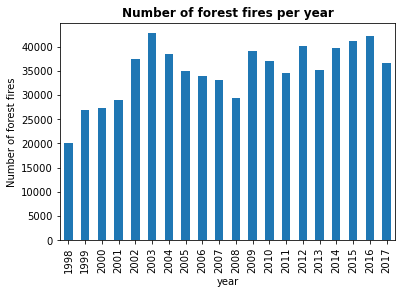

In [65]:
df.groupby("year")["number"].sum().plot(kind = "bar");
plt.ylabel("Number of forest fires")
plt.title("Number of forest fires per year", weight = "bold")
plt.show()

- Based on the observation of this graph, it can be deduced that **2003** exhibits the greatest number of recorded forest fires, followed by **2016** and **2015**.

### 15. Which state has the maximum number of forest fires reported?
- a. Visualization should be there
- b. If find that barplot is overlapping, then please fix it using rotation

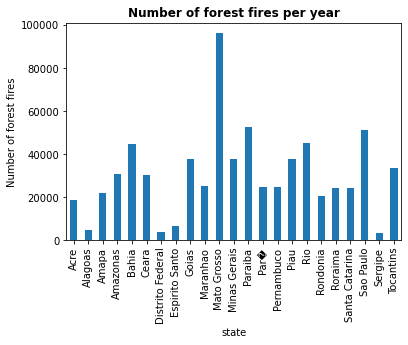

In [66]:
df.groupby("state")["number"].sum().plot(kind = "bar");
plt.ylabel("Number of forest fires")
plt.title("Number of forest fires per year", weight = "bold")
plt.show()

- Based on the observation of this graph, it can be deduced that **Mato Grassco** exhibits the greatest number of recorded forest fires.

### 16. Find total number of fires were reported in amazonas (state of brazil)
- a. Add in comment the number of reports

In [67]:
amazonas_df = df[df["state"]=="Amazonas"]
amazonas_df.head(2)

,year,state,month,number,date
718,1998,Amazonas,January,0.0,1998-01-01
719,1999,Amazonas,January,3.0,1999-01-01


In [68]:
print("Total number of fires were reported in amazonas:",int(amazonas_df["number"].sum()))

Total number of fires were reported in amazonas: 30650


### 17. Display number of fires were reported in amazon (year-wise)
- a. Kindly visualize it using barplot after having groupby. 
- Please take care of plot overlapping (it should be neat and clean)

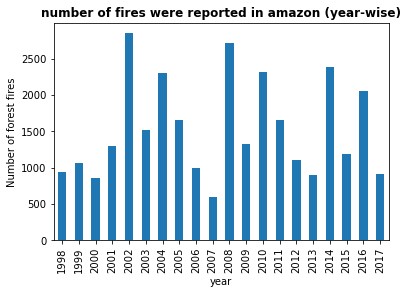

In [69]:
amazonas_df.groupby("year")["number"].sum().plot(kind = "bar");
plt.ylabel("Number of forest fires")
plt.title("number of fires were reported in amazon (year-wise)", weight = "bold")
plt.show()

- Based on the observation of this graph, it can be deduced that **2002** exhibits the greatest number of recorded forest fires in amazonas, followed by **2008** and **2014**.

### 18. Display number of fires were reported in amazon (day-wise)
- a. You need to visualize the result using weekdays name
- b. Don’t forget to mention your observation in comment

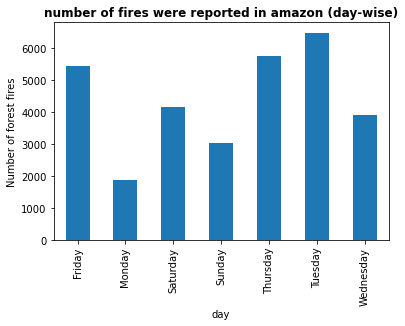

In [70]:
amazonas_df["day"] = amazonas_df["date"].apply(lambda x: x.day_name())
amazonas_df.groupby("day")["number"].sum().plot(kind = "bar");
plt.ylabel("Number of forest fires")
plt.title("number of fires were reported in amazon (day-wise)", weight = "bold")
plt.show()

- Based on the observation of this graph, it can be deduced that **Tuesday** exhibits the greatest number of recorded forest fires in amazonas, followed by **Thursday** and **Friday**.

### 19. Find the total number of fires reported in 2015 and visualize databased on each ‘month’.
- a. Showing output with beautiful barplot
- b. Mention your observation in comment

In [71]:
df_2015 = df[df["year"]==2015]
df_2015.head(2)

,year,state,month,number,date
17,2015,Acre,January,1.0,2015-01-01
37,2015,Acre,February,2.0,2015-01-01


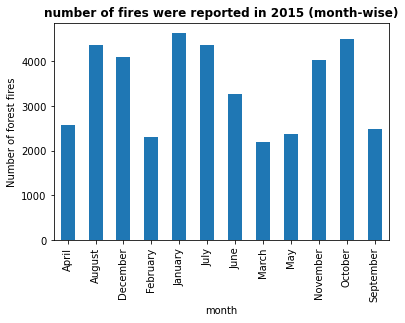

In [72]:
df_2015.groupby("month")["number"].sum().plot(kind = "bar");
plt.ylabel("Number of forest fires")
plt.title("number of fires were reported in 2015 (month-wise)", weight = "bold")
plt.show()

- Based on the observation of this graph, it can be deduced that **January** exhibits the greatest number of recorded forest fires, followed by **October** and **August**.

### 20. Find the average number of fires reported from highest to lowest(state-wise)

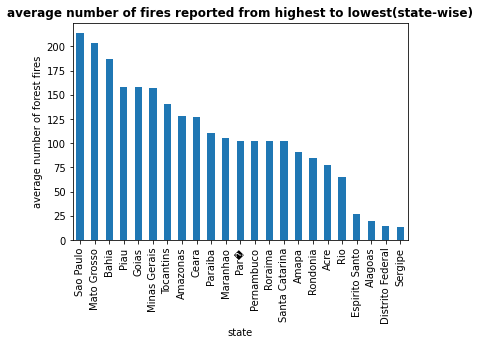

In [73]:
df.groupby("state")["number"].mean().sort_values(ascending = False).plot(kind = "bar");
plt.ylabel("average number of forest fires")
plt.title("average number of fires reported from highest to lowest(state-wise)", weight = "bold")
plt.show()

- Based on the observation of this graph, it can be deduced that **Sao Paulo** exhibits the highest average number of recorded forest fires, followed by **Mato Grossco** and **Bahia**.

### 21. To find the state names where fires were reported in 'dec' month

In [44]:
df_dec = df[(df["month"]=="December") & (df["number"]>0)]#["number"].value_counts()
df_dec["state"].unique()

array(['Acre', 'Alagoas', 'Amapa', 'Amazonas', 'Bahia', 'Ceara',
       'Distrito Federal', 'Espirito Santo', 'Goias', 'Maranhao',
       'Mato Grosso', 'Minas Gerais', 'Par�', 'Paraiba', 'Pernambuco',
       'Piau', 'Rio', 'Rondonia', 'Roraima', 'Santa Catarina',
       'Sao Paulo', 'Sergipe', 'Tocantins'], dtype=object)